In [1]:
#visualize part
import pandas as pd
data_vis = pd.read_csv("/Users/weijiepan/Desktop/506_project_visualization_data.csv")
data_vis = data_vis.drop(["Unnamed: 0"],axis=1)

In [2]:
data_label = data_vis
#younger teenager adult seniors elder
#age_dict = {1:"younger",2:"teenager",3:"adult",4:"seniors",5:"elder"}
data_label.loc[data_label["age"]==1,"age"]="younger"
data_label.loc[data_label["age"]==2,"age"]="teenager"
data_label.loc[data_label["age"]==3,"age"]="adult"
data_label.loc[data_label["age"]==4,"age"]="seniors"
data_label.loc[data_label["age"]==5,"age"]="elder"

#gender
#gender_dict = {1:"male",2:"female"}
data_label.loc[data_label["gender"]==1,"gender"]="male"
data_label.loc[data_label["gender"]==2,"gender"]="female"

In [3]:
#Va plot
VA = data_label.groupby(["diabetes","age","gender","insurance"])["VA"].mean()   
VA.unstack(0).plot.barh()

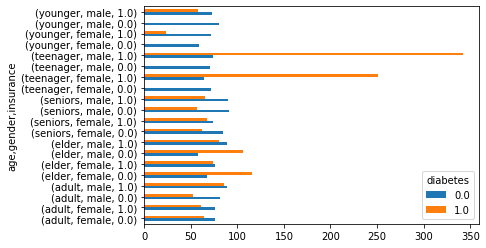

In [4]:
#VC plot
VC = data_label.groupby(["diabetes","age","gender","insurance"])["VC"].mean()   
VC.unstack(0).plot.barh()

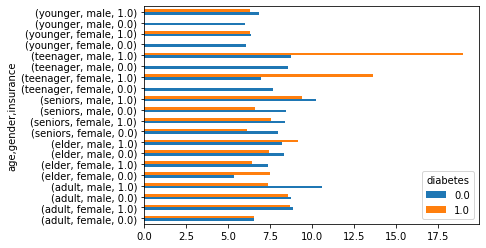

In [5]:
#VE plot
VE = data_label.groupby(["diabetes","age","gender","insurance"])["VE"].mean()   
VE.unstack(0).plot.barh()

In [6]:
#model part 
#read the data
data = pd.read_csv("/Users/weijiepan/Desktop/506_project_data.csv")
data = data.drop(["Unnamed: 0"],axis=1)

In [7]:
#create intecept terms

colnames=["iron","calcium","zine","sodium","VE","VA","alcohol","VC",
     "fat","dietary fiber","sugar","carbohydrate","energy","protein"]
for i in colnames:
    data[i+"_ins"] = data[i]*data["insurance"]

In [8]:
#divide it into X(preditors) y(result)
X = data.drop(["id","diabetes","insurance"],axis=1)
y = data["diabetes"]

In [9]:
#deal with categorical features
#age, gender, income
gender = pd.get_dummies(X['gender'],drop_first=True)
gender.columns=["gender"+str(i) for i in gender.columns]

age = pd.get_dummies(X['age'],drop_first=True)
age.columns=["age"+str(i) for i in age.columns]

income = pd.get_dummies(X['income'],drop_first=True)
income.columns=["income"+str(i) for i in income.columns]

X.drop(['gender','age','income'],axis=1,inplace=True)

X = pd.concat([X,gender,age,income],axis=1)

In [10]:
#split it into training set and test set
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    test_size=0.3,
                                                                    random_state=42,
                                                                    stratify=y)

In [11]:
#build the model
from sklearn.metrics import accuracy_score 
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

model = LogisticRegressionCV(penalty='l1',scoring='roc_auc',solver="saga",
                             cv=10,class_weight={1:.9,0:.1},max_iter=1000)
model.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight={0: 0.1, 1: 0.9}, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='warn', n_jobs=None,
                     penalty='l1', random_state=None, refit=True,
                     scoring='roc_auc', solver='saga', tol=0.0001, verbose=0)

In [12]:
import matplotlib as plt

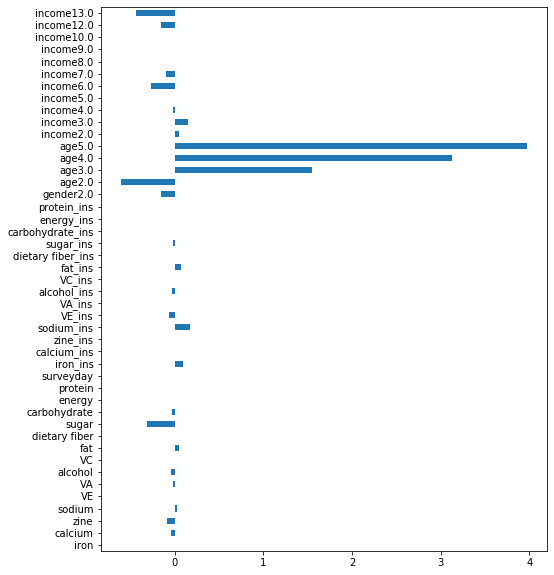

In [13]:
#display the coef 
coef = pd.Series(model.coef_[0,:], index = X_train.columns)
plt.rcParams['figure.figsize'] = (8.0, 10.0)
coef.plot(kind = "barh")

In [14]:
coef

iron                 0.000000
calcium             -0.039413
zine                -0.081084
sodium               0.021210
VE                   0.000000
VA                  -0.018091
alcohol             -0.042815
VC                   0.000191
fat                  0.046871
dietary fiber        0.004829
sugar               -0.309096
carbohydrate        -0.030602
energy               0.000000
protein              0.000000
surveyday            0.000000
iron_ins             0.091770
calcium_ins          0.000000
zine_ins             0.000000
sodium_ins           0.175666
VE_ins              -0.062518
VA_ins               0.000000
alcohol_ins         -0.030342
VC_ins               0.000000
fat_ins              0.069452
dietary fiber_ins    0.000000
sugar_ins           -0.018800
carbohydrate_ins     0.000000
energy_ins           0.000000
protein_ins          0.000000
gender2.0           -0.154585
age2.0              -0.607063
age3.0               1.543364
age4.0               3.130511
age5.0    

In [15]:
roc_auc_score(y_test,model.predict(X_test))

0.7853936407598631

In [17]:
accuracy_score(y_test,model.predict(X_test))

0.725968797181681